In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Overview
The dataset comprises customer demographics, account specifics, service subscriptions, payment methods, and churn status. The target variable is `Churn`, a binary indicator of whether a customer has discontinued their service. The following visualizations are designed to identify which binary features significantly influence a customer's decision to churn.

In [195]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape) 
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [196]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [197]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [198]:
for x in ['Contract', 'InternetService', 'PaymentMethod','gender','SeniorCitizen']:
      print(df.groupby(x)['Churn'].value_counts())

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64
InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: count, dtype: int64
PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: count, dtype: int64
gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64
SeniorCitizen  Churn
0

### EDA & Visualization

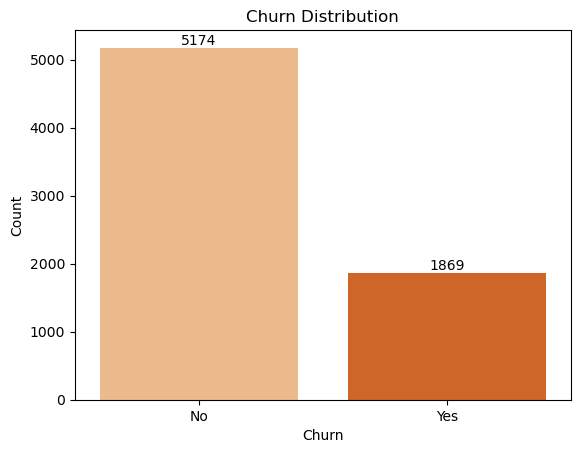

In [199]:

ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='Oranges')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

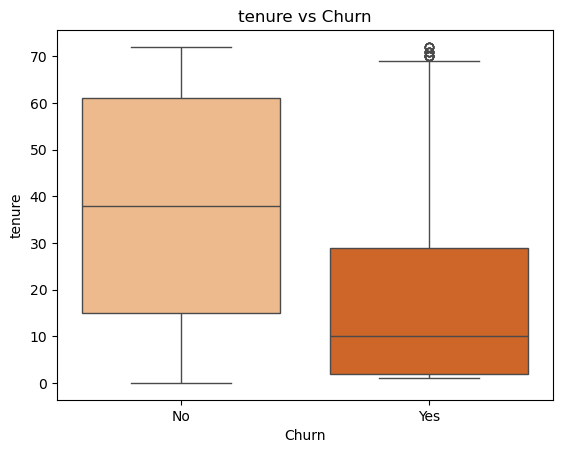

In [200]:
sns.boxplot(data=df, x='Churn', y='tenure',palette='Oranges',hue='Churn')
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.title('tenure vs Churn')
plt.show()

-> Customers with lower tenure are significantly more likely to churn, the most frequent happened during the early stages of the customer lifecycle (first 0–30 months).

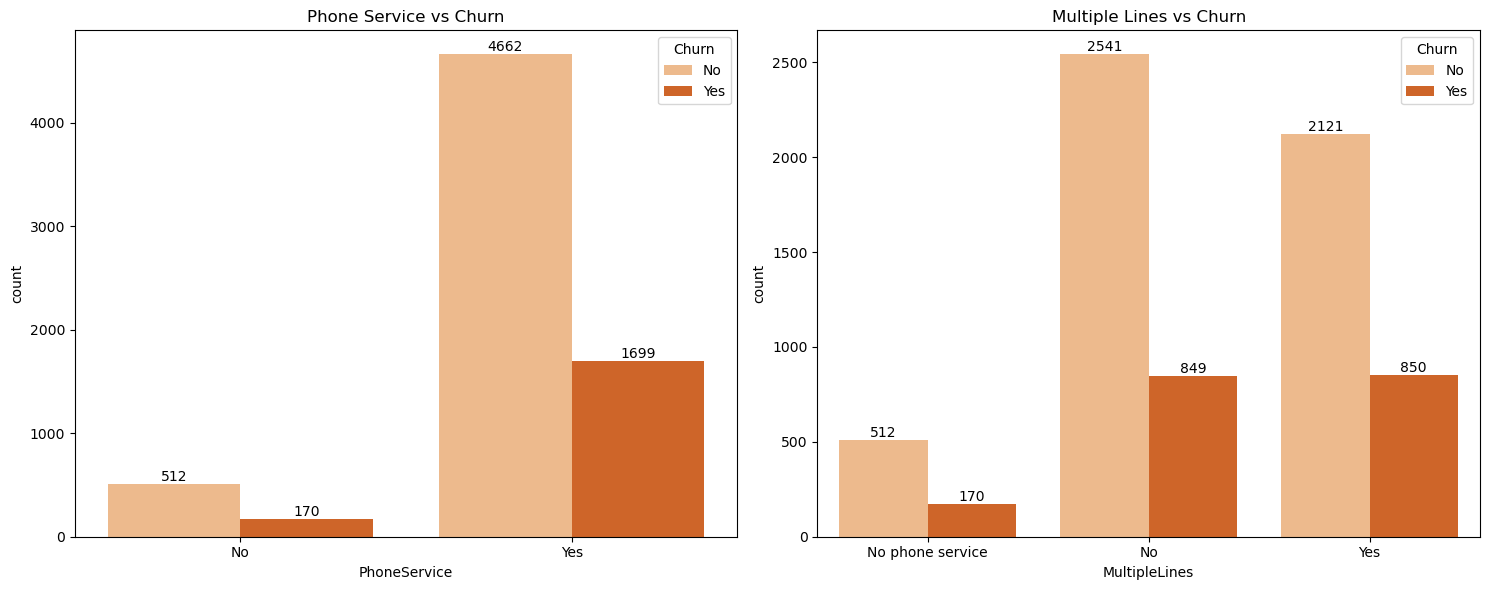

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='PhoneService', hue='Churn', palette='Oranges', ax=ax[0])
ax[0].set_title('Phone Service vs Churn')
for c in ax[0].containers: 
    ax[0].bar_label(c)

sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='Oranges', ax=ax[1])
ax[1].set_title('Multiple Lines vs Churn')
for c in ax[1].containers: 
    ax[1].bar_label(c)

plt.tight_layout()
plt.show()

-> Phone service and phone line service (Single vs. Multiple lines) show no significant correlation with churn behavior.

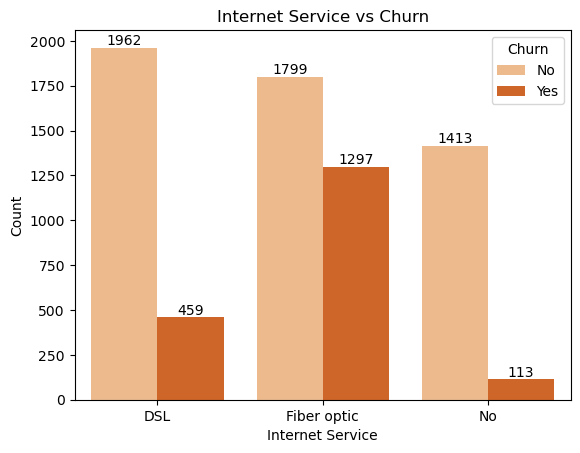

In [202]:
ax = sns.countplot(data=df, x='InternetService', hue='Churn', palette='Oranges')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count') 
plt.show()

-> Fiber optic customers are a significant driver of churn.

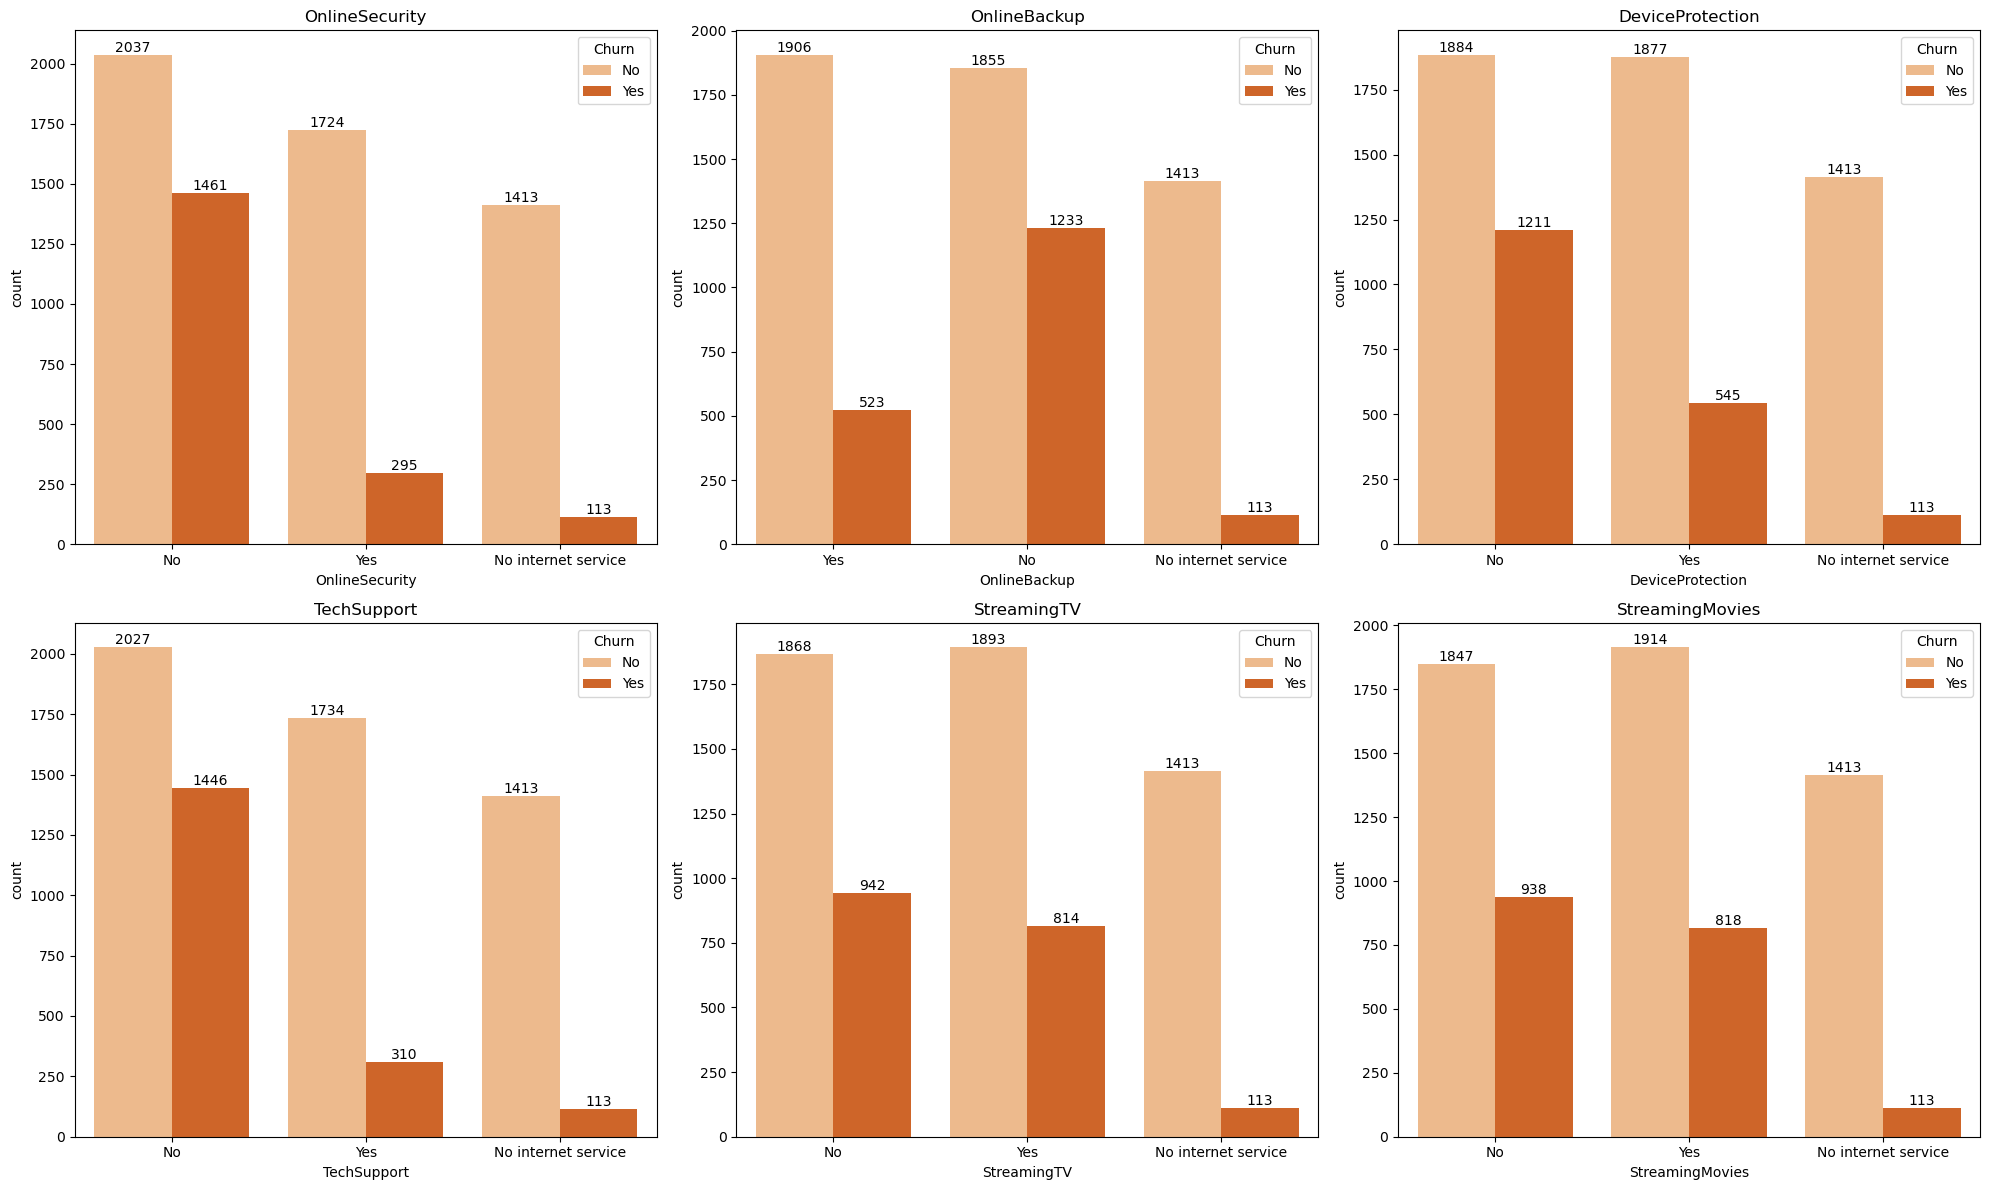

In [203]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='Oranges', ax=ax[0, 0])
ax[0, 0].set_title('OnlineSecurity')
for c in ax[0, 0].containers: ax[0, 0].bar_label(c)

sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette='Oranges', ax=ax[0, 1])
ax[0, 1].set_title('OnlineBackup')
for c in ax[0, 1].containers: ax[0, 1].bar_label(c)

sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette='Oranges', ax=ax[0, 2])
ax[0, 2].set_title('DeviceProtection')
for c in ax[0, 2].containers: ax[0, 2].bar_label(c)

sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Oranges', ax=ax[1, 0])
ax[1, 0].set_title('TechSupport')
for c in ax[1, 0].containers: ax[1, 0].bar_label(c)

sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='Oranges', ax=ax[1, 1])
ax[1, 1].set_title('StreamingTV')
for c in ax[1, 1].containers: ax[1, 1].bar_label(c)

sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='Oranges', ax=ax[1, 2])
ax[1, 2].set_title('StreamingMovies')
for c in ax[1, 2].containers: ax[1, 2].bar_label(c)

plt.tight_layout()
plt.show()

-> Customers who do not subscribe to security and support add-ons (OnlineSecurity and TechSupport) exhibit a significantly higher churn volume, suggesting that these services play a crucial role in enhancing customer retention. 

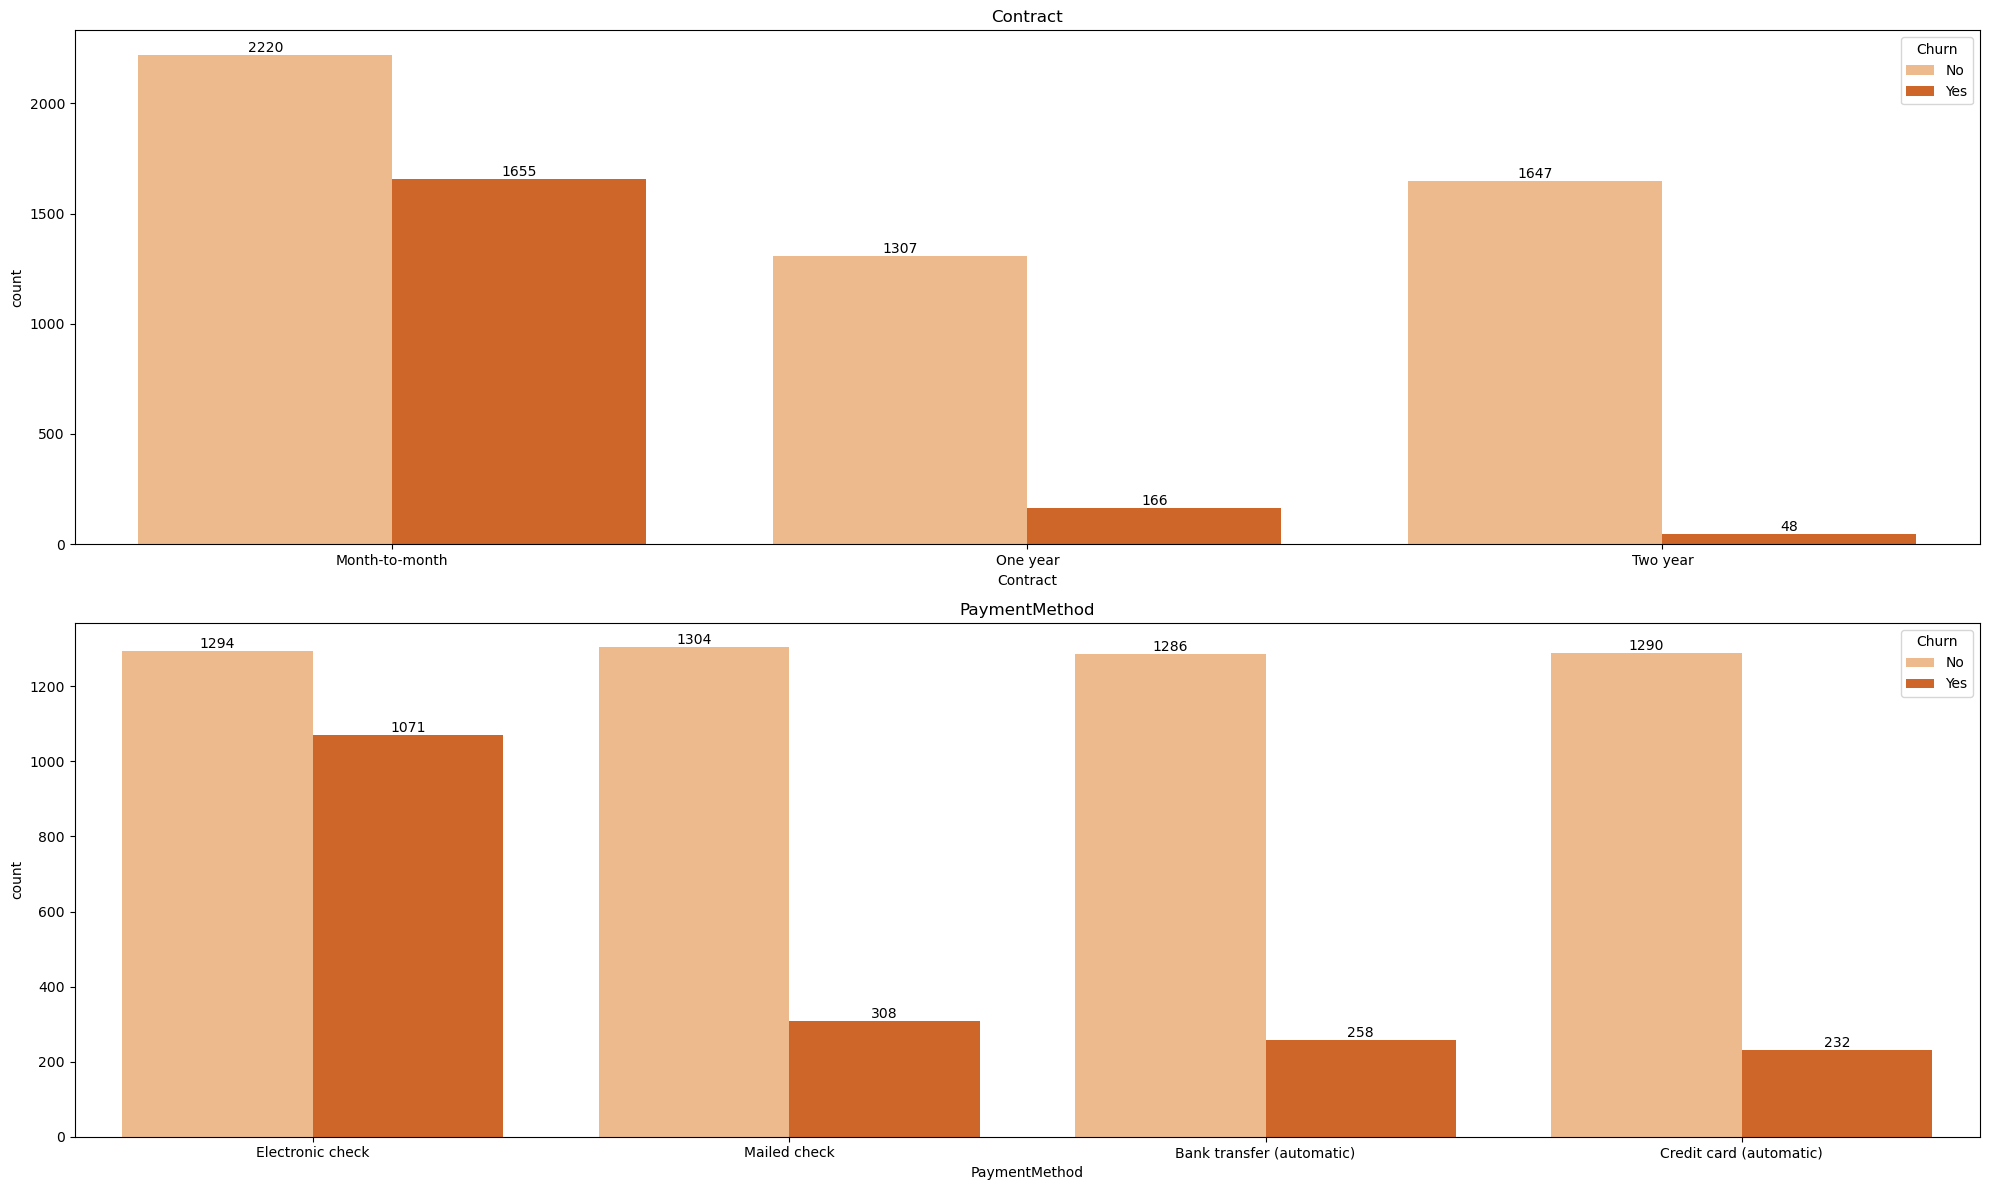

In [204]:

fig, ax = plt.subplots(2, 1, figsize=(20, 12))

sns.countplot(data=df, x='Contract', hue='Churn', palette='Oranges', ax=ax[0])
ax[0].set_title('Contract')
for c in ax[0].containers: 
    ax[0].bar_label(c)

sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Oranges', ax=ax[1])
ax[1].set_title('PaymentMethod')
for c in ax[1].containers: 
    ax[1].bar_label(c)

plt.tight_layout()
plt.show()

-> Customers on Month-to-month contracts are the absolute highest risk group, with a massive churn volume (1,655) compared to One-year and Two-year contracts. Electronic Check (1,071) payment method is the primary churn, with 1,071 churned customers—more than triple the attrition volume of any other payment category. 

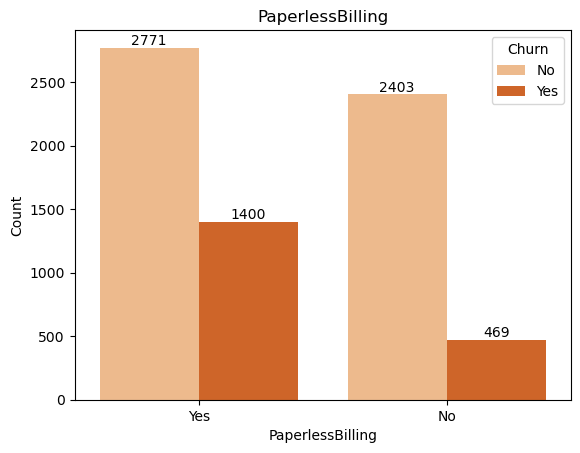

In [205]:
ax = sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='Oranges')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.title('PaperlessBilling')
plt.show()

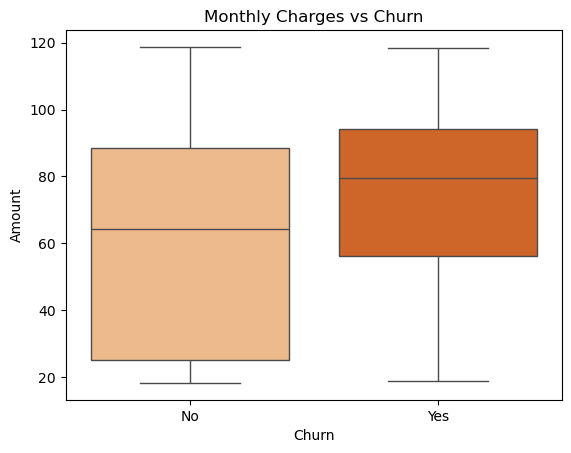

In [206]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges',palette='Oranges',hue='Churn')
plt.xlabel('Churn')
plt.ylabel('Amount')
plt.title('Monthly Charges vs Churn')
plt.show()

-> Churn is heavily concentrated among high-value customers, as those who leave typically pay higher monthly fees (median ~$80) compared to retained customers (median ~$65).

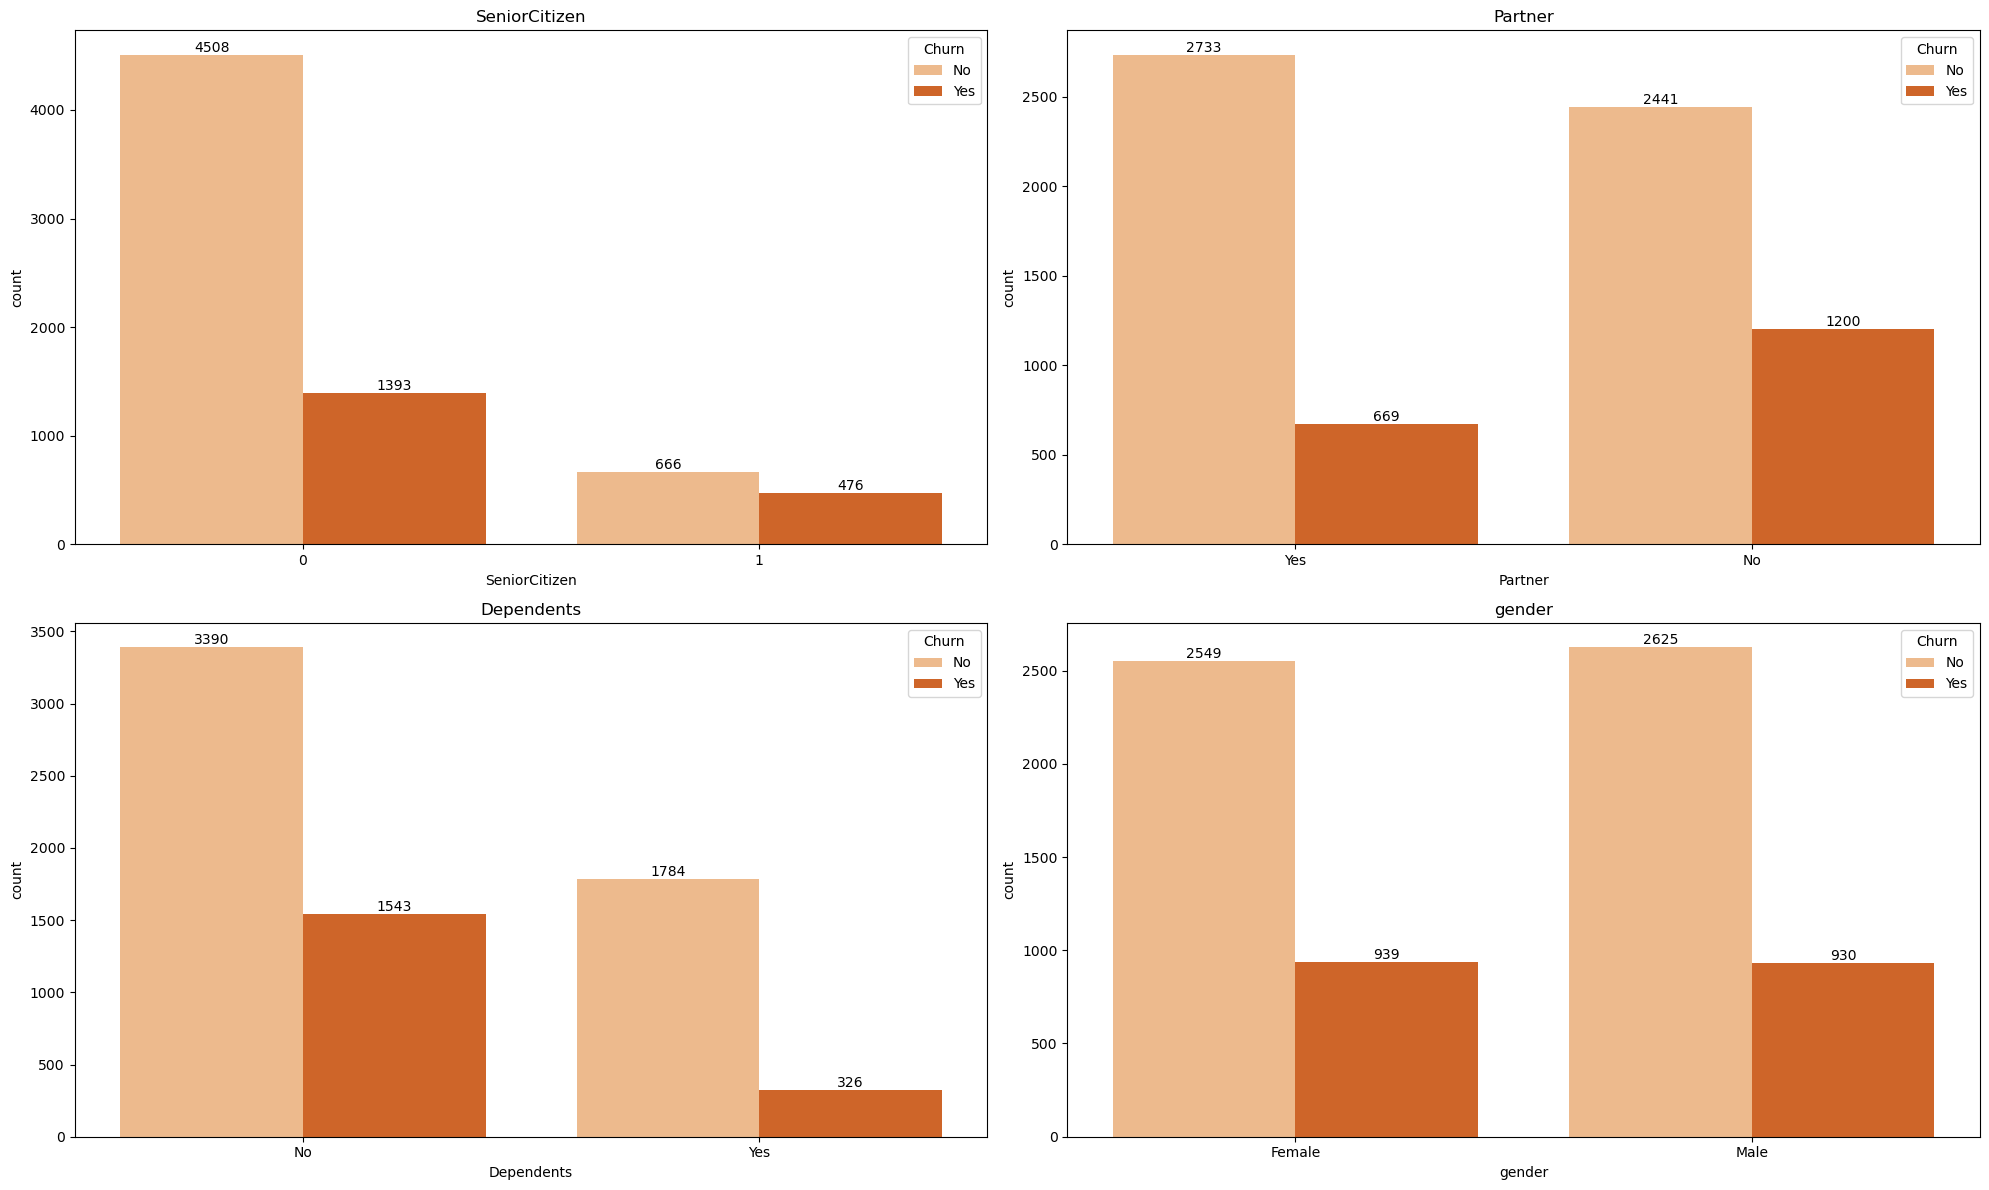

In [207]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Oranges', ax=ax[0, 0])
ax[0, 0].set_title('SeniorCitizen')
for c in ax[0, 0].containers: ax[0, 0].bar_label(c)

sns.countplot(data=df, x='Partner', hue='Churn', palette='Oranges', ax=ax[0, 1])
ax[0, 1].set_title('Partner')
for c in ax[0, 1].containers: ax[0, 1].bar_label(c)

sns.countplot(data=df, x='Dependents', hue='Churn', palette='Oranges', ax=ax[1, 0])
ax[1, 0].set_title('Dependents')
for c in ax[1, 0].containers: ax[1, 0].bar_label(c)

sns.countplot(data=df, x='gender', hue='Churn', palette='Oranges', ax=ax[1, 1])
ax[1, 1].set_title('gender')
for c in ax[1, 1].containers: ax[1, 1].bar_label(c)

plt.tight_layout()
plt.show()

-> Churn is most prevalent among customers with fewer social or familial ties, specifically those without partners or dependents, while gender shows no significant impact on attrition.

### Key Insights
**Tenure**: New customers are the most vulnerable, specifically within the first 20 months of service.

**Service & Value**: Fiber optic users are primary churn drivers, typically associated with high monthly charges (Median ~$80).

**Add-on Services**: A lack of add-ons services like OnlineSecurity and TechSupport strongly correlates with higher churn volumes.

**Contract**: Month-to-month contract status is the primary driver influencing a customer's decision to leave the service.

**Payment Method**: Electronic Check is a critical risk factor, accounting for over 1,071 churners, triple the volume of any other payment method.

**Demographics**: Customers with no partners or dependents show significantly higher attrition rates, while gender is a neutral factor.

### Data Processing & Feature Selection
Based on key insights, the following steps are recommended for the modeling phase:

**Categorical Feature Selection**: To optimize the prediction model, focusing on encoding the following high-impact categorical variables:

- InternetService (Priority: Fiber optic)

- Contract (Priority: Month-to-month)

- PaymentMethod (Priority: Electronic check)

- OnlineSecurity / TechSupport (Binary indicators for "No" service)

- Partner / Dependents (Social tie indicators)

**Encoding Strategy**:

- Apply Label Encoding or Mapping for binary features (e.g. Partner, Dependents, Churn).

- Apply One-Hot Encoding for multi-class categorical features like InternetService, Contract and PaymentMethod to capture the specific risk of Fiber Optic and Electronic Checks without implying a numerical order.

**Numerical Handling**: Tenure and MonthlyCharges should be kept as continuous variables, though binning Tenure into "Early Stage" (0-20 months) could provide additional predictive power.

In [208]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

`TotalCharges` is formatted as an object type. This need to be converted into a numeric format (float64) and handle any potential "empty strings" that might be causing the issue.

In [209]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Number of false values in TotalCharges column: {df['TotalCharges'].isnull().sum()}")

Number of false values in TotalCharges column: 11


In [210]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df['TotalCharges'].dtype)

float64


In [211]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int)
print(df['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [212]:
demo_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in demo_cols:
    df[col] = (df[col] == 'Yes').astype(int)
print(df[demo_cols].head())

   Partner  Dependents  PhoneService  PaperlessBilling
0        1           0             0                 1
1        0           0             1                 0
2        0           0             1                 1
3        0           0             0                 0
4        0           0             1                 1


In [213]:
multi_feature_cols = [
    'Contract', 'PaymentMethod', 'InternetService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df_encoded = pd.get_dummies(df, columns=multi_feature_cols,dtype=int)
for col in df_encoded.columns:
    if any(original in col for original in multi_feature_cols):
        print(col)
df_encoded.head()

Contract_Month-to-month
Contract_One year
Contract_Two year
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
InternetService_DSL
InternetService_Fiber optic
InternetService_No
MultipleLines_No
MultipleLines_No phone service
MultipleLines_Yes
OnlineSecurity_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_No internet service
StreamingMovies_Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,1,29.85,29.85,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,56.95,1889.50,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,1,53.85,108.15,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,...,0,1,0,0,1,0,0,1,0,0


In [214]:
df_encoded['EarlyStage'] = (df_encoded['tenure'] <= 20).astype(int)
print(df_encoded[['tenure', 'EarlyStage']].head())

   tenure  EarlyStage
0       1           1
1      34           0
2       2           1
3      45           0
4       2           1


In [215]:
cols_to_drop = ['customerID', 'gender']
df_final = df_encoded.drop(columns=cols_to_drop, errors='ignore')
df_final.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,EarlyStage
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,1,0,0,1
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0,0,0,2,1,1,53.85,108.15,1,1,...,1,0,0,1,0,0,1,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,0,0,1,1,0,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,1,0,0,1


In [216]:
df_final.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,EarlyStage
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889,0.138360,...,0.205620,-0.182742,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,-0.022458
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448,-0.280865,...,-0.109443,0.000615,0.119999,-0.124357,0.000615,0.124666,-0.117529,0.000615,0.117412,-0.317997
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221,-0.231720,...,-0.172645,0.139812,0.063268,-0.101176,0.139812,-0.016558,-0.078198,0.139812,-0.039741,-0.140744
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229,-0.645561,...,-0.262143,-0.039062,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.841447
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942,-0.000742,...,-0.054447,0.172209,-0.096340,-0.122455,0.172209,-0.022574,-0.112254,0.172209,-0.032959,-0.000305
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825,0.169096,...,0.230136,-0.321013,0.037880,0.047712,-0.321013,0.223841,0.059488,-0.321013,0.211716,-0.004941
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356,0.060165,...,0.322076,-0.763557,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,-0.207946
TotalCharges,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324,-0.444255,...,-0.082874,-0.375223,0.431883,-0.195884,-0.375223,0.514973,-0.202188,-0.375223,0.520122,-0.672188
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000,0.405103,...,0.337281,-0.227890,-0.164674,0.128916,-0.227890,0.063228,0.130845,-0.227890,0.061382,0.318752
Contract_Month-to-month,0.138360,-0.280865,-0.231720,-0.645561,-0.000742,0.169096,0.060165,-0.444255,0.405103,1.000000,...,0.439110,-0.218639,-0.285241,0.295479,-0.218639,-0.112282,0.300457,-0.218639,-0.116633,0.542598


### Splitting into Training and Testing Sets
1. Logistic Regression: The Baseline
2. Random Forest Regression

#### Logistic Regression

In [217]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=42)
print(f"Training set: {df_train.shape}")
print(f"Testing set: {df_test.shape}")

Training set: (5634, 41)
Testing set: (1409, 41)


In [218]:
features = [
    'Contract_Month-to-month',       
    'InternetService_Fiber optic',    
    'PaymentMethod_Electronic check', 
    'MonthlyCharges',                 
    'PaperlessBilling',               
    'SeniorCitizen',                  
    'tenure',                         
    'Contract_Two year',              
    'InternetService_No',             
    'Partner', 
    'OnlineSecurity_No', 
    'TechSupport_No',
    'EarlyStage'
]
target = 'Churn'

print(f"Features selected: {features}")
print(f"Target variable: {target}")

Features selected: ['Contract_Month-to-month', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'tenure', 'Contract_Two year', 'InternetService_No', 'Partner', 'OnlineSecurity_No', 'TechSupport_No', 'EarlyStage']
Target variable: Churn


### Logistic Regression Model

In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay
)

In [220]:
X = df_final[features]
y = df_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  
)

In [242]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lr = LogisticRegression(
    C=1.0,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
lr.fit(X_train_scaled, y_train)

y_pred_lr       = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("LOGISTIC REGRESSION RESULTS")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))


LOGISTIC REGRESSION RESULTS
Accuracy:  0.7374
Precision: 0.5034
Recall:    0.8021
F1-Score:  0.6186
ROC-AUC:   0.8373

Confusion Matrix:
[[739 296]
 [ 74 300]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.71      0.80      1035
       Churn       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [222]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Top 10 Features:")
print(feature_importance.head(10))

Top 10 Features:
                           Feature  Coefficient
6                           tenure    -0.549890
0          Contract_Month-to-month     0.367579
3                   MonthlyCharges     0.336432
7                Contract_Two year    -0.321973
1      InternetService_Fiber optic     0.260702
10               OnlineSecurity_No     0.239325
2   PaymentMethod_Electronic check     0.202329
4                 PaperlessBilling     0.185232
11                  TechSupport_No     0.181154
12                      EarlyStage     0.142499


### Random Forest Model

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [224]:
X = df_final[features]
y = df_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [225]:
clf_rf = RandomForestClassifier(
    n_estimators=200, 
    criterion='entropy', 
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

clf_rf.fit(X_train, y_train)
print("Random Forest trained successfully!")

Random Forest trained successfully!


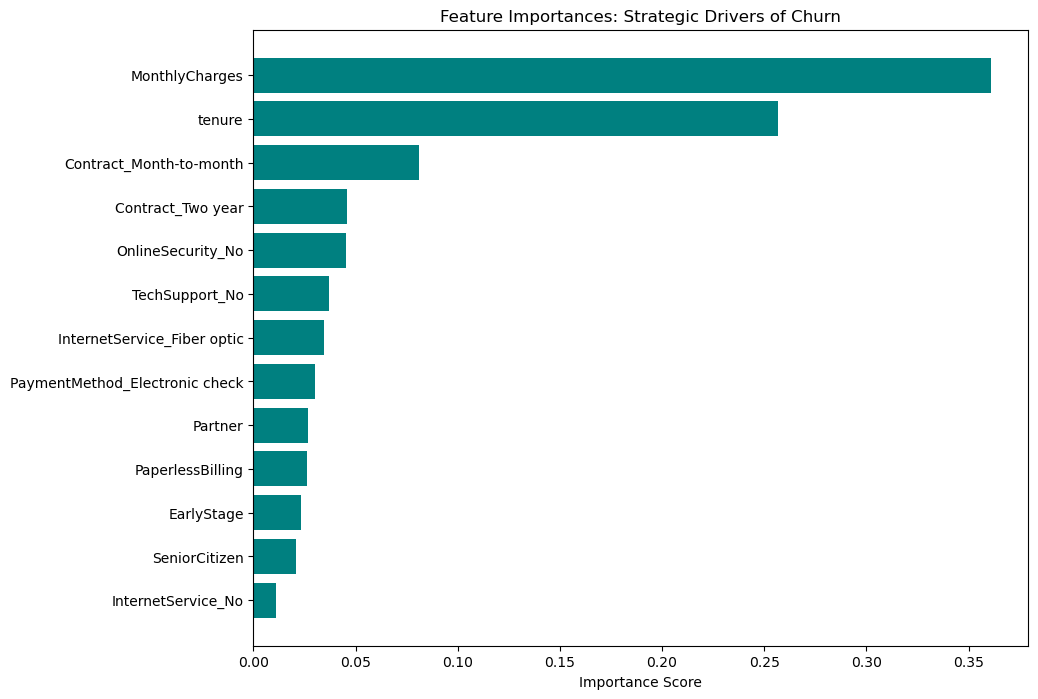

In [226]:
importances = clf_rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, importances[sorted_idx], color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importances: Strategic Drivers of Churn')
plt.gca().invert_yaxis()
plt.show()

In [227]:
y_pred_rf = clf_rf.predict(X_test)
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:, 1]

print("\n" + "=" * 60)
print("RANDOM FOREST RESULTS")
print("=" * 60)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_rf):.4f}")


RANDOM FOREST RESULTS
Accuracy:  0.7828
Precision: 0.6097
Recall:    0.5053
F1-Score:  0.5526
ROC-AUC:   0.8127


In [245]:
print("RANDOM FOREST RESULTS")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

RANDOM FOREST RESULTS
Accuracy:  0.7828
Precision: 0.6097
Recall:    0.5053
F1-Score:  0.5526
ROC-AUC:   0.8127

Confusion Matrix:
[[914 121]
 [185 189]]


### Model Comparison

In [244]:
comparison = pd.DataFrame({
    'Metric':              ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Logistic Regression': [0.7374, 0.5034, 0.8021, 0.6186, 0.8373],
    'Random Forest':       [0.7828, 0.6097, 0.5053, 0.5526, 0.8127]
})
print(comparison.set_index('Metric'))


           Logistic Regression  Random Forest
Metric                                       
Accuracy                0.7374         0.7828
Precision               0.5034         0.6097
Recall                  0.8021         0.5053
F1-Score                0.6186         0.5526
ROC-AUC                 0.8373         0.8127


### Cross-Validation

In [246]:
from sklearn.model_selection import cross_val_score

metrics = ['accuracy', 'precision', 'recall', 'f1']

print("5-Fold Cross-Validation Results:")
print("=" * 60)

for metric in metrics:
    lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring=metric)
    rf_scores = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring=metric)
    print(f"\n{metric.upper()}:")
    print(f"  Logistic Regression: {lr_scores.mean():.4f} (+/- {lr_scores.std():.4f})")
    print(f"  Random Forest:       {rf_scores.mean():.4f} (+/- {rf_scores.std():.4f})")

5-Fold Cross-Validation Results:

ACCURACY:
  Logistic Regression: 0.7449 (+/- 0.0211)
  Random Forest:       0.7772 (+/- 0.0093)

PRECISION:
  Logistic Regression: 0.5135 (+/- 0.0256)
  Random Forest:       0.6012 (+/- 0.0248)

RECALL:
  Logistic Regression: 0.7913 (+/- 0.0135)
  Random Forest:       0.4803 (+/- 0.0069)

F1:
  Logistic Regression: 0.6226 (+/- 0.0227)
  Random Forest:       0.5338 (+/- 0.0129)


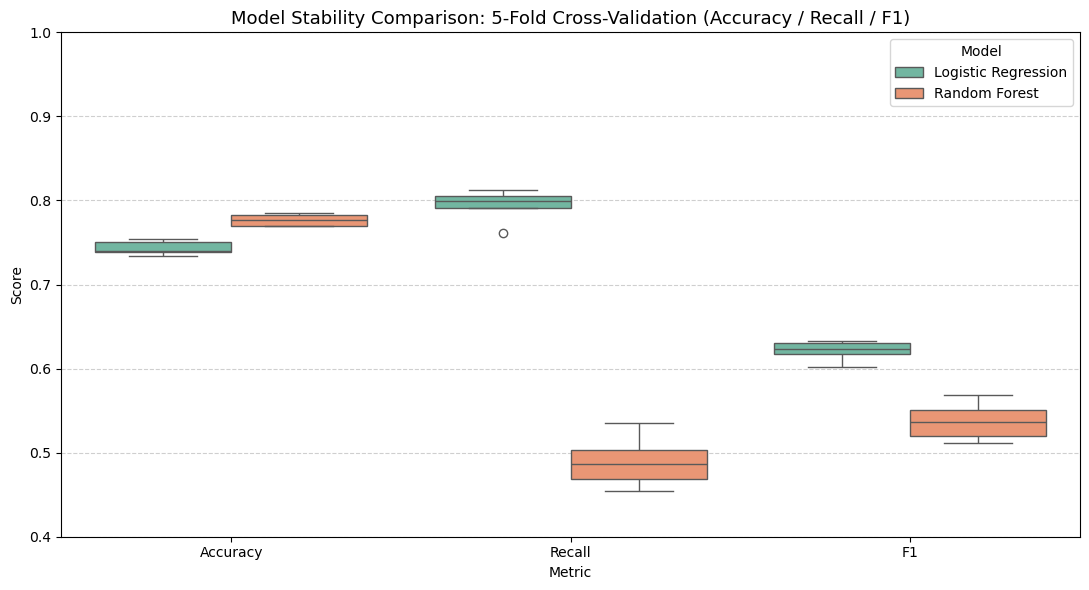

In [249]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=cv_df, x='Metric', y='Score', hue='Model', palette='Set2')
plt.title('Model Stability Comparison: 5-Fold Cross-Validation (Accuracy / Recall / F1)', fontsize=13)
plt.ylim(0.4, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()